# Практическая работа №1: Название работы
Выполнил студент гр. 0373 Савинов Алексей. Вариант №18

## Цель работы
Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу. Получение практических навыков нахождения точечных статистических оценок параметров распределения, а также вычисления интервальных статистических оценок параметров распределения выборочных данных и проверки
«справедливости» статистических гипотез.

## Основные теоретические положения
Формула Стёрджеса для нахождения количества интервалов в интервальном ряду: $k=[1+\log_2n]$  

Формула для нахождения условных вариант:$u_i=$ ${x_i-C}\over{h}$, $C$ - ложный нуль (как правило, находится в середине вариационного ряда, или в среднем интервале с большей частотой, $h$ - размер интервала

Формулы центральных моментов через условные: 
$\mu^*_1=0 $, $\mu^*_2=(\nu^*_2-(\nu^*_1)^2)h^2 $, $\mu^*_3=(\nu^*_3-3\nu^*_1\nu^*_2+2(\nu^*_1)^3)h^3 $, $\mu^*_4=(\nu^*_4-4\nu^*_1\nu^*_3+6\nu^*_2(\nu^*_1)^2-3(\nu^*_1)^4)h^4$  

Формула условного эмпирического момента: $\nu^*_r=\frac{1}{n}\sum^k_{i=1}n_iu^r_i$  

Формула выборочного среднего: $\overline{x_B}=\frac{1}{n}\sum^n_{i+1}x_i n_i$, $\bar{x_B}=h\nu^*_1+C$ 

Формула асимметрии: $a_s^*=\frac{\mu^*_3}{\sigma^3_B} $  
Формула эксцесса: $\varepsilon_k^* = \frac{\mu^*_4}{\sigma^4_B}-3$  

Формула доверительного интервала для мат ожидания при неизвестном СКО: $(\overline{x_B}-\frac{t_\gamma s}{\sqrt{n}}, \overline{x_B}+\frac{t_\gamma s}{\sqrt{n}})$

Формула доверительного интервала для СКО при неизвестном мат ожидании: $(s(1-q),s(1+q))$

Формула теоретической вероятности: $P_i(x_{i-1}<x<x_i)=\Phi(\frac{x_i-a}{\sigma})-\Phi(\frac{x_{i-1}-a}{\sigma})$

Формула для $\chi^2$-наблюдаемого: $\chi^2$-набл$=\sum^k_{i=1}\frac{n^2_i}{n^{'}_i}-n$

## Постановка задачи
Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Для заданных выборочных данных вычислить с использованием метода моментов и условных вариант точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации исследуемой случайной величины. Для заданной надёжности определить границы доверительных интервалов для математического ожидания и среднеквадратичного отклонения случайной величины. Проверить гипотезу о нормальном распределении исследуемой случайной величины с помощью критерия Пирсона $\chi^2$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
disp_pres = 2
pd.set_option(f'display.float_format', f'{{:.{disp_pres}f}}'.format)

### Из генеральной совокупности сформировать выборку заданного объёма в соответствии с полученным от преподавателя номером. Указать, какого вида выборка получилась.


Выборка представлена в <u>первом столбце</u> таблицы в файле _"Данные для практических работ.csv"_. Выборка является бесповторной, по способу формирования - типическая (где тип - гражданство).

In [3]:
path_to_sample = 'Данные для практических работ.csv'
sample = pd.read_csv(path_to_sample)['Численность мужчин'].to_numpy()
print('Выборка:\n', sample)

Выборка:
 [ 978312  966625  970566  917863  853102  863463  857518  813679  749112
  750085  755253  748448  723064  678063  695233  655347  683040  663024
  700673  742078  781609  793958  914698 1020020 1163598 1193708 1242958
 1302735 1286842 1258254 1228945 1252750 1172164 1114281 1182117 1082828
 1066460 1026842 1033174 1035658  995980  965729  966995  934254  972290
  863960  849414  829053  849965  892921  901363  962407  987525 1028900
 1100148 1001552  982023  944453  892002  878552  852172  755880  746720
  704000  689749  672650  541564  515193  442140  264549  190082  168071
  231996  342676  357487  362132  339548  330453  246490  200577  144100
  125610  135405  122222  120177  100786   87753   67333   48731   31074]


### Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Результаты содержательно проинтерпретировать.

In [4]:
# построим ранжированный ряд
samp_uniq = np.array(np.unique(sample, return_counts=True))
rang_inds = samp_uniq[1].argsort()
print('Ранжированный ряд:\n', samp_uniq[0][rang_inds[::1]])

# построим вариационный ряд
print('Вариационный ряд:')
display(pd.DataFrame(np.swapaxes(samp_uniq, 0, 1), 
             columns = ['Значение', 'Количество']))

# построим интервальный ряд
assert len(samp_uniq[0]) > 1, 'Интервальный ряд построить не удалось!'

inter_k = round(np.log2(len(sample))) + 1
inter_h = (np.max(samp_uniq[0]) - np.min(samp_uniq[0])) / inter_k
# найдем границы интервалов
inter_bounds = np.linspace(np.min(sample), 
                     np.max(sample), inter_k+1)
# построим интервалы для отображения
intervals = [f'({np.round(inter_bounds[i], 2)}; {np.round(inter_bounds[i+1], 2)}]' 
             for i in range(len(inter_bounds)-1)]
intervals[0] = '[' + intervals[0][1:]
# найдем среднее значение для каждого интервала
inter_means = np.array([(inter_bounds[i+1]+inter_bounds[i])/2 
               for i in range(len(inter_bounds)-1)])
# найдем количество значений в каждом интервале
inter_counts = np.array([np.count_nonzero(
    np.logical_and(samp_uniq[0] > inter_bounds[i],
                   samp_uniq[0] <= inter_bounds[i+1])
) for i in range(len(inter_bounds)-1)])
inter_counts[0] += 1
inter_freqs = inter_counts / len(sample)
# отобразим
tab1_4_2 = pd.DataFrame(
    {
        '$$i$$': range(1, len(intervals)+1),
        '$$(x_{i-1}, x_i]$$': intervals, 
        '$$\hat{x_i}$$': inter_means, 
        '$$n_i$$': inter_counts, 
        '$$p_i^*$$': inter_freqs
    }
)
print('Интервальный ряд:')
HTML(tab1_4_2.to_html(index=False))

Ранжированный ряд:
 [  31074  970566  966995  966625  965729  962407  944453  934254  917863
  972290  914698  892921  892002  878552  863960  863463  857518  853102
  852172  901363  978312  982023  987525 1258254 1252750 1242958 1228945
 1193708 1182117 1172164 1163598 1114281 1100148 1082828 1066460 1035658
 1033174 1028900 1026842 1020020 1001552  995980  849965  849414  829053
  813679  357487  342676  339548  330453  264549  246490  231996  200577
  190082  168071  144100  135405  125610  122222  120177  100786   87753
   67333   48731  362132 1286842  442140  541564  793958  781609  755880
  755253  750085  749112  748448  746720  742078  723064  704000  700673
  695233  689749  683040  678063  672650  663024  655347  515193 1302735]
Вариационный ряд:


,Значение,Количество
0,31074,1
1,48731,1
2,67333,1
3,87753,1
4,100786,1
...,...,...
85,1242958,1
86,1252750,1
87,1258254,1
88,1286842,1


Интервальный ряд:


$$i$$,"$$(x_{i-1}, x_i]$$",$$\hat{x_i}$$,$$n_i$$,$$p_i^*$$
1,[31074.0; 212739.86],121906.93,13,0.14
2,(212739.86; 394405.71],303572.79,8,0.09
3,(394405.71; 576071.57],485238.64,3,0.03
4,(576071.57; 757737.43],666904.50,17,0.19
5,(757737.43; 939403.29],848570.36,18,0.20
6,(939403.29; 1121069.14],1030236.21,21,0.23
7,(1121069.14; 1302735.0],1211902.07,10,0.11


**Ранжированный ряд:** каждое значение в выборке встречается 1 раз, следовательно, порядок элементов в ранжированном ряду может быть любым.

**Вариационный ряд:** каждое значение встречается 1 раз, следовательно, во столбце "Количество" во всех строках находятся значения "1".

**Интервальный ряд:** используя формулу Стёрджеса, исходный интервал можно разделить на 7 интервалов равной длины.

### Для интервального ряда абсолютных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию. Сделать выводы.

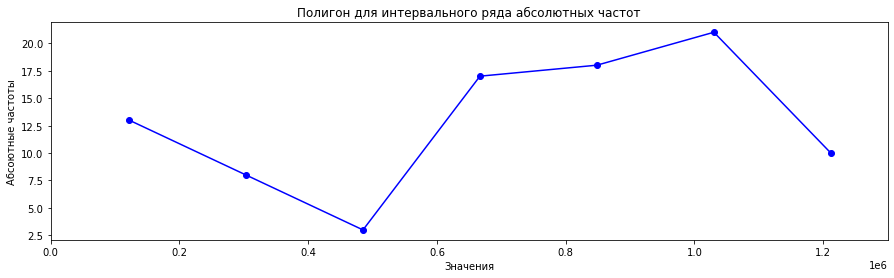

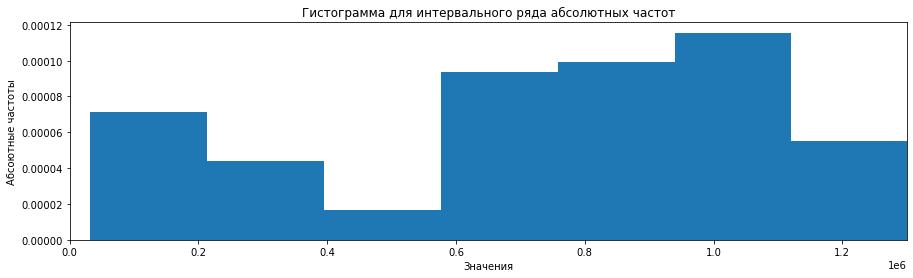

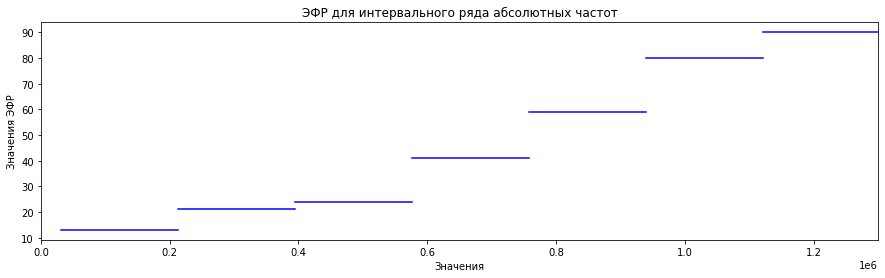

In [19]:
# отобразим полигон абсолютных частот 
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
plt.plot(inter_means, inter_counts, c='blue')
plt.scatter(inter_means, inter_counts, c='blue')
plt.title('Полигон для интервального ряда абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Абсоютные частоты')

# отобразим гистограмму
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
plt.bar(inter_means, inter_counts/inter_h, width=inter_h)
plt.title('Гистограмма для интервального ряда абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Абсоютные частоты')

#отобразим эмпирическую функцию распределения
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
hist, edges = np.histogram(sample, bins=len(sample))
inter_counts_cum = inter_counts.cumsum()
for i in range(len(inter_counts)):
    plt.plot([inter_bounds[i], inter_bounds[i+1]], 
             [inter_counts_cum[i], inter_counts_cum[i]], c='blue')
plt.title('ЭФР для интервального ряда абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Значения ЭФР')
plt.show()

Полигон значений показывает количества значений, которые попали в каждый интервал интервального ряда. Гистограмма сравнительные количества значений, попавших в различные интервалы, имеет площадь, равную числу элементов выборки. График эмпирической функции распределения показывает изменение величины накопленного количества значений

### Аналогичные действия выполнить для интервального ряда относительных частот. Сравнить результаты и сделать выводы.

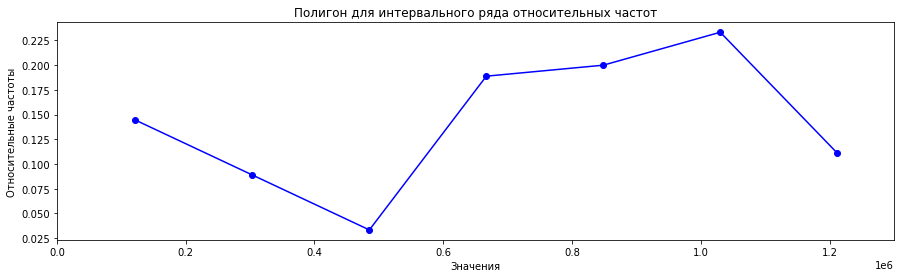

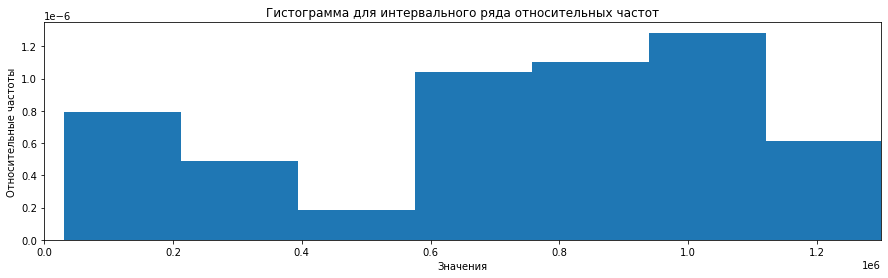

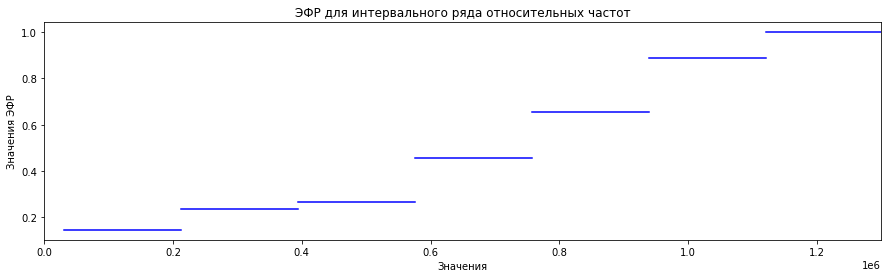

In [21]:
# отобразим полигон относительных частот 
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
plt.plot(inter_means, inter_freqs, c='blue')
plt.scatter(inter_means, inter_freqs, c='blue')
plt.title('Полигон для интервального ряда относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')

# отобразим гистограмму относительных частот
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
plt.bar(inter_means, inter_freqs/inter_h, width=inter_h)
plt.title('Гистограмма для интервального ряда относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')

#отобразим эмпирическую функцию распределения
plt.figure(figsize=(15, 4))
plt.xlim([0, 1.3e6])
hist, edges = np.histogram(sample, bins=len(sample))
inter_freqs_cum = inter_freqs.cumsum()
for i in range(len(inter_counts)):
    plt.plot([inter_bounds[i], inter_bounds[i+1]], 
             [inter_freqs_cum[i], inter_freqs_cum[i]], c='blue')
plt.title('ЭФР для интервального ряда относительных частот')
plt.xlabel('Значения')
plt.ylabel('Значения ЭФР')
plt.show()

Графики для абсолютных и относительных частот выглядят идентично с точностью до нормирования значений на величину, равную количеству значений для графиков относительных частот. Значения функций выше для абсолютных частот лежат в диапазоне $[0; +\infty]$, а значений функций для относительных частот - в диапазоне $[0; 1]$

### Для интервального ряда найти середины интервалов, а также накопленные частоты. Результаты представить в виде таблицы (в последней строке $\Sigma$ необходимо записать сумму столбца):

In [ ]:
inter_counts_cum = np.cumsum(inter_counts)
inter_freqs_cum = np.cumsum(inter_freqs)
tab1_4_5 = pd.DataFrame(
    {
        '$$i$$': np.append(
            np.arange(1, len(intervals)+1).astype(str),
            '$$\Sigma$$'
        ),
        '$$(x_{i-1}, x_i]$$': np.append(intervals, '$$-$$'),
        '$$\hat{x_i}$$': np.append(
            np.round(inter_means, 2).astype(str),
            '$$-$$'
        ),
        '$$n_i$$': np.append(inter_counts, np.sum(inter_counts)),
        '$$p_i^*$$': np.append(inter_freqs, np.sum(inter_freqs)),
        '$$n_i^{\Sigma}$$': np.append(inter_counts_cum.astype(str), '$$-$$'),
        '$$p_i^{\Sigma}$$': np.append(
            np.round(inter_freqs_cum, 2).astype(str),
            '$$-$$'
        )
    }
)
HTML(tab1_4_5.to_html(index=False))

### Для полученных вариант вычислить условные варианты. Заполнить расчётную таблицу (в последней строке $\Sigma$ необходимо записать сумму столбца)

In [ ]:
assert len(intervals) > 0, 'Условные варианты рассчитать не удалось!'

# найдем ложный нуль
num_inters = len(inter_bounds) - 1
fict_zero = None
# один средний интервал
if num_inters % 2 != 0:
    fict_zero = np.mean([inter_bounds[num_inters // 2], 
                               inter_bounds[num_inters // 2 - 1]])
# два средних интервала
else:
    fict_zero = inter_means[num_inters // 2 - 1] if \
        inter_counts[num_inters // 2 - 1] >= inter_counts[num_inters // 2] \
        else inter_means[num_inters // 2 - 1]
# далее рассчитаем условные варианты
cond_variant = ((inter_means - fict_zero) / \
    (inter_bounds[1] - inter_bounds[0])).astype(np.int64)
nu = np.multiply(cond_variant, inter_counts)
nu2 = np.multiply(cond_variant, nu)
nu3 = np.multiply(cond_variant, nu2)
nu4 = np.multiply(cond_variant, nu3)
nu_14 = np.multiply(np.power(cond_variant+1, 4), inter_counts)
tab1_4_6 = pd.DataFrame(
    {
        '$$i$$': np.append(
            np.arange(1, len(intervals)+1).astype(str),
            '$$\Sigma$$'
        ),
        '$$(x_{i-1}, x_i]$$': np.append(intervals, '$-$'),
        '$$\hat{x_i}$$': np.append(
            np.round(inter_means, 2).astype('str'),
            '$$-$$'
        ),
        '$$n_i$$': np.append(inter_counts, np.sum(inter_counts)),
        '$$u_i$$': np.append(cond_variant.astype(str), '$-$'),
        '$$n_i u_i$$': np.append(nu, np.sum(nu)),
        '$$n_i u_i^2$$': np.append(nu2, np.sum(nu2)),
        '$$n_i u_i^3$$': np.append(nu3, np.sum(nu3)),
        '$$n_i u_i^4$$': np.append(nu4, np.sum(nu4)),
        '$$n_i(u_i+1)^4$$': np.append(nu_14, np.sum(nu_14))
    }
)
HTML(tab1_4_6.to_html(index=False))

Проконтролируем корректность вычислений. Для этого раскроем скобки в выражении суммы элементов последнего столбца, и выразим через выражения сумм других столбцов: $\sum_{i=1}^{k} n_i(u_i+1)^4 = \sum_{i=1}^{k} n_i u_i^4 + 4 \sum_{i=1}^{k} n_i u_i^3 + 6 \sum_{i=1}^{k} n_i u_i^2 + 4 \sum_{i=1}^{k} n_i u_i + \sum_{i=1}^{k} n_i$. Проверим рассчетом

In [ ]:
print(np.sum(nu4) + 4 * np.sum(nu3) + 6 * np.sum(nu2) + \
    4 * np.sum(nu) + np.sum(inter_counts), '==', np.sum(nu_14), '?')
print(np.sum(nu4) + 4 * np.sum(nu3) + 6 * np.sum(nu2) + \
    4 * np.sum(nu) + np.sum(inter_counts) == np.sum(nu_14))

###  Вычислить условные эмпирические моменты $\nu_𝑖^*$ через условные варианты. С помощью условных эмпирических моментов вычислить центральные эмпирические моменты $\mu_𝑖^*$. Полученные результаты занести в таблицу

In [ ]:
nu = [np.sum(inter_counts * cond_variant ** i) / len(sample)
      for i in range(1, 5)]
mu = np.zeros((4))
mu[0] = 0
mu[1] = (nu[1] - nu[0] ** 2) * inter_h ** 2
mu[2] = (nu[2] - 3 * nu[1] * nu[0] + 2 * nu[0] ** 3) * inter_h ** 3
mu[3] = (nu[3] - 4 * nu[2] * nu[0] + 6 * nu[1] * nu[0] ** 2 - 
         3 * nu[0] ** 4) * inter_h ** 4
tab1_4_7 = pd.DataFrame(
    {
        '$$i$$': np.arange(1, 5),
        '$$ν_𝑖^*$$': nu,
        '$$\mu_𝑖^*$$': mu
    }
)
HTML(tab1_4_7.to_html(index=False))

### Вычислить выборочные среднее и дисперсию с помощью стандартной формулы и с помощью условных вариант. Убедиться, что результаты совпадают

In [ ]:
samp_mean = np.sum(sample) / len(sample)
samp_var = np.sum((sample - samp_mean) ** 2) / len(sample)
print('Выборочное среднее')
print('\tС помощью стандартной формулы:\t', np.round(samp_mean, 2))
print('\tС помощью условных вариант:\t', 
      np.round(nu[0] * inter_h + fict_zero, 2))
print('Выборочная дисперсия')
print('\tС помощью стандартной формулы:\t', np.round(samp_var, 2))
print('\tС помощью условных вариант:\t', np.round(mu[1], 2))

Результаты не совпадают, но схожи.

### Вычислить исправленную выборочную дисперсию и исправленное СКО. Сравнить данные оценки с смещёнными оценками дисперсии и СКО.

In [ ]:
# рассчитаем смещенную оценку СКО
samp_std = np.sqrt(samp_var)
# рассчитаем исправленную выборочную дисперсию
corr_samp_var = len(sample) / (len(sample) - 1) * samp_var
# рассчитаем исправленное СКО
corr_samp_std = np.sqrt(corr_samp_var)

print('Выборочные оценки дисперсии')
print('\tСмещенная оценка дисперсии:\t', samp_var)
print('\tНесмещенная оценка дисперсии:\t', corr_samp_var)
print('Выборочные оценки СКО')
print('\tСмещенная оценка СКО:\t', samp_std)
print('\tНесмещенная оценка СКО:\t', corr_samp_std)

Результаты не совпадают, но схожи. В общем, несмещенная оценка всегда больше смещенной, исходя из формул, по которым они рассчитываются.

### Найти статистическую оценку коэффициентов асимметрии и эксцесса. Сделать выводы

In [ ]:
# рассчитаем выборочный коэффициент асимметрии (skewness)
samp_skew = mu[2] / np.sqrt(mu[1]) ** 3
# рассчитаем выборочный коэффициент эксцесса (kurtosis)
samp_kurt = mu[3] / mu[1] ** 2 - 3
print('оценка коэффициента асимметрии:', samp_skew)
print('оценка коэффициента эксцесса:', samp_kurt)

По полученному значению оценки коэффициента асимметрии можно сделать вывод, что распределение "скошено" влево, но незначительно. По полученному значению оценки коэффициента эксцесса можно сделать вывод, что распределение является менее "островершенным" относительно нормального распределения с параметрами $a = \overline{x_B}$, $\sigma = \sigma_B$, 

### Вычислить моду, медиану и коэффициент вариации для заданного распределения. Сделать выводы.

In [ ]:
# функция, которая склеивает два соседних интервала по указанному индексу,
# и склеивает соседние пары интервалов рядом с ними, если можно
def join_inters(inter_counts, inter_bounds, idx, fir_inter_max):
    assert len(inter_counts) == len(inter_bounds) - 1
    assert idx >= 0 and idx < len(inter_counts) - 1
    inter_counts_ext = np.copy(inter_counts)
    inter_bounds_ext = np.copy(inter_bounds)
    # убираем границу
    inter_bounds_ext = np.delete(inter_bounds_ext, idx+1)
    # склеиваем частоты
    inter_counts_ext[idx] += inter_counts_ext[idx+1]
    # убираем частоту следующего интервала
    inter_counts_ext = np.delete(inter_counts_ext, idx+1)
    # объединяем соседние интервалы по возможности
    # левые два
    if idx - 2 >= 0 and \
    inter_counts_ext[idx-1] < fir_inter_max and \
    inter_counts_ext[idx-2] < fir_inter_max:
        inter_bounds_ext = np.delete(inter_bounds_ext, idx-1)
        inter_counts_ext[idx-2] += inter_counts_ext[idx-1]
        inter_counts_ext = np.delete(inter_counts_ext, idx-1)
        idx -= 1
    # правые два
    if idx + 2 < len(inter_counts_ext) and \
    inter_counts_ext[idx+1] < fir_inter_max and \
    inter_counts_ext[idx+2] < fir_inter_max:
        inter_bounds_ext = np.delete(inter_bounds_ext, idx+2)
        inter_counts_ext[idx+1] += inter_counts_ext[idx+2]
        inter_counts_ext = np.delete(inter_counts_ext, idx+2)
    return inter_counts_ext, inter_bounds_ext

# функция, объединяющая интервалы соседние модальные интервалы, и 
# близлежащие, по возможности
def join_mode_inters(inter_counts, inter_bounds):
    assert len(inter_counts) == len(inter_bounds) - 1
    inter_counts_ext = np.copy(inter_counts)
    inter_bounds_ext = np.copy(inter_bounds)
    # будем склеивать модальные интервалы, пока 
    # существуют соседние модальные интервалы
    fir_inter_max = np.max(inter_counts_ext)
    while len(np.argwhere(inter_counts_ext == fir_inter_max)) != 0:
        mode_inters = np.concatenate(
            np.argwhere(inter_counts_ext == fir_inter_max))
        adj_mode_inters_idx = -1
        for i in range(len(mode_inters)-1):
            print(mode_inters[i], mode_inters[i+1] - 1, mode_inters[i] == mode_inters[i+1] - 1)
            if mode_inters[i] == mode_inters[i+1] - 1:
                adj_mode_inters_idx = mode_inters[i]
                break
        if adj_mode_inters_idx == -1:
            break
        # если соседние модальные интервалы существуют, объединим
        else:
            inter_counts_ext, inter_bounds_ext= join_inters(
                inter_counts_ext, inter_bounds_ext, 
                adj_mode_inters_idx, fir_inter_max
            )
            
    return inter_counts_ext, inter_bounds_ext, fir_inter_max

# функция для подсчета моды заданного интервала
def count_inter_mode(inter_counts, inter_bounds, inter_h, idx):
    assert len(inter_counts) == len(inter_bounds) - 1
    assert idx >= 0 and idx < len(inter_counts) - 1
    inter_counts_ext = np.concatenate(([0], inter_counts, [0]))
    idx += 1
    return inter_bounds[idx-1] + \
        (inter_counts_ext[idx] - inter_counts_ext[idx-1]) / \
        (inter_counts_ext[idx] - inter_counts_ext[idx-1] + \
         inter_counts_ext[idx] - inter_counts_ext[idx+1]) * inter_h

In [ ]:
# вычислим моду для интервального ряда
inter_counts_ext = np.copy(inter_counts)
inter_counts_ext, inter_bounds_ext, fir_inter_max = join_mode_inters(
    inter_counts_ext, inter_bounds)

samp_mode = [count_inter_mode(inter_counts, inter_bounds, inter_h, i) \
    for i in np.concatenate(np.argwhere(inter_counts_ext >= fir_inter_max))]
print('Мода(ы) распределения:', *np.round(samp_mode, disp_pres))

# вычислим медиану
samp_median = None
med_idx = np.where(inter_freqs_cum >= 0.5)[0][0]
if med_idx == 0:
    samp_median = inter_bounds[med_idx] + (0.5 * len(sample)) / \
        inter_counts_cum[med_idx]
else:
    samp_median = inter_bounds[med_idx] + (0.5 * len(sample) - \
        inter_counts_cum[med_idx-1]) / inter_counts_cum[med_idx]
print('Медиана распределения:', np.round(samp_median, disp_pres))

# вычислим коэффициент вариации
std = np.sqrt(samp_var) / np.abs(samp_mean)
print(f'Коэффициент вариации: {np.round(std*100, disp_pres)}%')

Мода в классическом смысле не существует, так как все значения выборки встречаются одинаковое количество раз (по одному разу), по этому была вычислена мода для интервального ряда. Заметим, что мода, медиана и выборочное среднее располагаются достаточно близко друг к другу. Это показывает относительную симметричность распределения. Также, значение коэффициента почти равно 50%. Это показывает большой разброс значений относительно среднего значения выборки.

### Вычислить точность и доверительный интервал для математического ожидания при неизвестном среднеквадратичном отклонении при заданном объёме выборки для доверительной точности $\gamma \in \{0.95, 0.99\}$. Сделать выводы

In [ ]:
t95 = scipy.stats.t.ppf(0.95, len(sample)-1)
t99 = scipy.stats.t.ppf(0.99, len(sample)-1)
# вычислим точности
acc95 = t95 * samp_std / np.sqrt(len(sample))
acc99 = t99 * samp_std / np.sqrt(len(sample))
print('Точность для мат. ожидания')
print(f'\tПри доверительной точности 0.95: {acc95}')
print(f'\tПри доверительной точности 0.99: {acc99}')

# вычислим границы доверительных интервалов
conf_inter_mean95 = [samp_mean - t95 * samp_std / np.sqrt(len(sample)), 
              samp_mean + t95 * samp_std / np.sqrt(len(sample))]
conf_inter_mean99 = [samp_mean - t99 * samp_std / np.sqrt(len(sample)), 
              samp_mean + t99 * samp_std / np.sqrt(len(sample))]
print('Доверительные интервалы для мат. ожидания')
print('\tПри доверительной точности 0.95: {', 
      conf_inter_mean95[0], '; ', conf_inter_mean95[1], '}', sep='')
print('\tПри доверительной точности 0.99: {', 
      conf_inter_mean99[0], '; ', conf_inter_mean99[1], '}', sep='')

# вычислим доверительный интервал 

Точность $\delta$ мат. ожидания для нормального распределения удовлетворяет неравенству $|\overline{x_B} - a| <\delta$. При больших значениях доверительной точности значения $\delta$ больше. При больших значениях доверительной точности размер доверительного интервала для математического ожидания больше.

### Для вычисления границ доверительного интервала для среднеквадратичного отклонения определить значение $𝑞$ при заданных $\gamma$ и $𝑛$. Построить доверительные интервалы, сделать выводы

In [ ]:
# ищем значение q для числа степеней свободы 89
q95 = 0.151
q99 = 0.211
conf_inter_std95 = [corr_samp_std * (1 - q95), corr_samp_std * (1 + q95)]
conf_inter_std99 = [corr_samp_std * (1 - q99), corr_samp_std * (1 + q99)]
print('Значения параметра q (размер выборки: ', len(sample), ')', sep='')
print('\tПри доверительной точности 0.95:', q95)
print('\tПри доверительной точности 0.99:', q99)
print('Доверительные интервалы для СКО')
print('\tПри доверительной точности 0.95: {', 
      conf_inter_std95[0], '; ', conf_inter_std95[1], '}', sep='')
print('\tПри доверительной точности 0.99: {', 
      conf_inter_std99[0], '; ', conf_inter_std99[1], '}', sep='')

При больших значениях доверительной точности значение параметра q больше. При больших значениях доверительной точности размер доверительного интервала для СКО больше.

### Проверить гипотезу о нормальности заданного распределения с помощью критерия $\chi^2$ (Пирсона). Для этого необходимо найти теоретические частоты и вычислить наблюдаемое значение критерия. Для удобства вычисления необходимо заполнить расчётную таблицу (в последней строке $\Sigma$ необходимо записать сумму столбца). Проконтролировать корректность вычисления $\chi^2$-наблюдаемое. Далее по заданному уровню значимости $\alpha = 0.05$ и числу степеней свободы $df$ найти критическую точку $\chi^2$-критическое и сравнить с наблюдаемым значением. Сделать выводы.

In [ ]:
# построим новые интервалы для таблицы
chi_intervals = np.copy(intervals)
chi_intervals[0] = f'(-inf; {np.round(inter_bounds[1], disp_pres)}]'
chi_intervals[len(chi_intervals)-1] = \
    f'({np.round(inter_bounds[len(inter_bounds)-2], disp_pres)}; +inf)'
# найдем выравненные частоты
pi = scipy.stats.norm.cdf((inter_bounds[1:len(inter_bounds)] - samp_mean)
                          / corr_samp_std)
pi = np.concatenate(([pi[0]], np.diff(pi)))
inter_counts_teor = pi * len(sample)
counts_diff_squar = (inter_counts - inter_counts_teor) ** 2
chi_observed = counts_diff_squar / inter_counts_teor
inter_counts_squar = inter_counts ** 2
counts_freqs_squar_over_inter_counts_teor = \
    inter_counts_squar / inter_counts_teor
tab1_4_14 = pd.DataFrame(
    {
        '$$i$$': np.append(
            np.arange(1, len(intervals)+1).astype(str),
            '$$\Sigma$$'
        ),
        '$$(x_{i-1}, x_i]$$': np.append(chi_intervals, '-'),
        '$$n_i$$': np.append(inter_counts, np.sum(inter_counts)),
        '$$p_i$$': np.append(pi, np.sum(pi)),
        '$$n_i^\prime$$': np.append(
            inter_counts_teor,
            np.sum(inter_counts_teor)
        ),
        '$$(n_i-n_i^\prime)^2$$': np.append(
            np.round(counts_diff_squar, disp_pres).astype(str), 
            '-'
        ),
        '$${(n_i-n_i^\prime)^2}\over{n_i^\prime}$$': np.append(
            chi_observed,
            np.sum(chi_observed)
        ),
        '$$n_i^2$$': np.append(inter_counts_squar.astype(str), '-'),
        '$${n_i^2}\over{n_i^\prime}$$': np.append(
            counts_freqs_squar_over_inter_counts_teor,
            np.sum(counts_freqs_squar_over_inter_counts_teor)
        )
    }
)
HTML(tab1_4_14.to_html(index=False))

Сравним $\chi^2$-наблюдаемое  с табличным значением ($\chi^2$-критическое). В интервальном ряду 7 интервалов, у нормального распределения 2 параметра, следовательно, число степеней свободы $df = 7 - 2 - 1 = 4$. По условию, $\alpha = 0.05$. Тогда $\chi^2$-критическое равно $\chi^2(\alpha, df) = \chi^2(0.05, 4) = 9.488$. 

$\chi^2$-наблюдаемое = 22.35 > 9.488 = $\chi^2$-критическое, следовательно, гипотезу о принадлежности нормальному распределению не принимаем.

## Выводы

В ходе работы было сделано:
- из генеральной совокупности сформирована выборка, состоящая из 90 элементов
- были получены ранжированный, вариационный и интервальный ряды
- для интервального ряда был построен полигон, гистограмма и эмпирическая функция
- для интервального ряда найдены середины интервалов, накопленные частоты
- для полученных вариант вычислены условные варианты
- вычислены выборочные среднее и дисперсию с помощью стандартной формулы и с помощью условных вариант
- вычислить исправленную выборочную дисперсию и исправленное СКО
- найдена статистическая оценка коэффициентов асимметрии и эксцесса
- вычислена мода, медиана и коэффициент вариации
- вычислена точность и доверительный интервал для математического ожидания и СКО
- проверена гипотеза о нормальности заданного распределения с помощью критерия $\chi^2$ (Пирсона)

По полученным значениям сделаны выводы.